# Frequency analysis with spatial data.

### Goals:

1. To move from frequency analysis on temporal data, (i.e., sounds), to frequency analysis in the spatial domain, (i.e., repeating structures, such as crystals or metal surfaces).
2. To move from 1-dimensional frequency analysis to 2-dimensional frequency analysis, (i.e, when the stuctures exist on a 2D surface).

### Timing

1. Try to finish this notebook in 30-35 minutes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifft2 # Python DFT
%matplotlib inline


# Outline for this Notebook

This notebook will go through an application of the Fourier transform to decipher the electronic properties of a specially designed metallic surface. The experimental data will be various images of an atomically flat copper sample that are captured using a device known as a **Scanning Tunneling Microscope (STM)**. An STM is essentially just a metallic scanning probe or "tip" that is moved very precisely across the metal surface. As the tip moves closer to the surface, an electrical current begins to develop between the sample and the tip, and this current is directly proportional to the amount of electrons on that part of the surface. A two-dimensional "image" is then constructed by measuring the current while the tip moves along a region of the surface, where points with a large amount of electrons will appear bright and those with less electrons appearing dark. An example of such a scan is shown below.

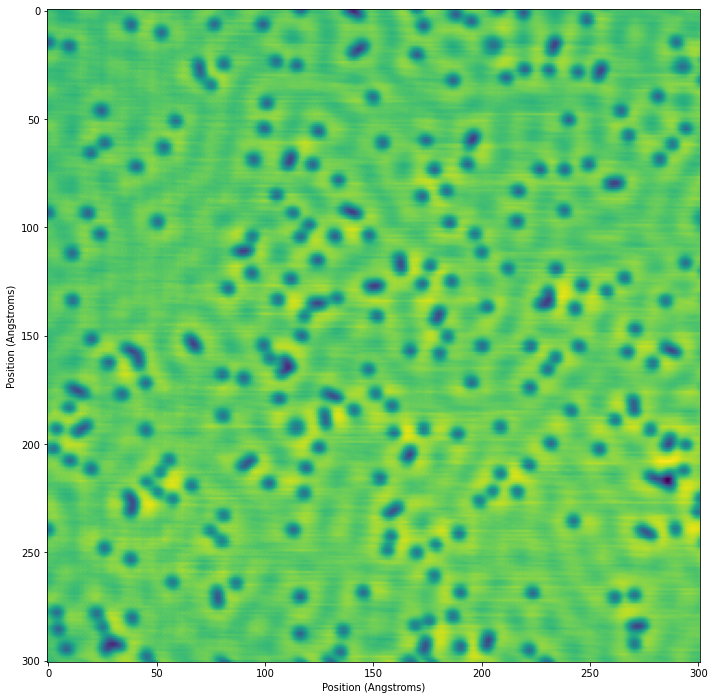

In [2]:
messy_2DEG = np.loadtxt("messy_topo.txt", delimiter=',')

plt.figure(figsize = (12,12))
plt.imshow(messy_2DEG)
plt.xlabel('Position (Angstroms)')
plt.ylabel('Position (Angstroms)')
plt.show()

This image is a **300 x 300 Angstrom** (1 Angstrom = $10^{-10}$ meters) scan of a Copper surface. The dark dots are individual carbon monoxide (CO) molecules that can be applied to the surface at various concentrations. The electrons fill in the space between these molecules; because electrons are roughly 1800 times smaller than protons or neutrons, we don't see individual electron particles but rather a **continuous density of electrons** across the sample surface. It is this "electron sea" or 2D electron gas that we image using an STM, and in the same way that rocks create ripples in water, we will see that defects like these molecules create waves in the electronic density that contain fundamental information about the quantum-mechanical nature of the electronic system.

The Fourier analysis methods from the previous notebook are well suited to studying wave-like structures in signals, and so all we have to do is take the methods we used previously for 1D waveforms and generalize them to 2D images like the one above. 

# Fourier Transform for 2D Images

Before we get to the electrons, lets try to develop intuition for how the Fourier transform works in 2D. Let's start like we did before with a simple example. The equivalent of a single-frequency sine wave in 2D is a waveform that varies periodically on one axis and remains constant in another. This is called a **plane wave**, and we can decompose any image into its constituent plane waves with varying amplitude and frequency just as we did in the 1D case. What is new here is now these plane waves also differ in the direction that they are oriented. We show a few examples of different plane waves and their corresponding 2D Fourier transforms.

### Horizontal plane wave

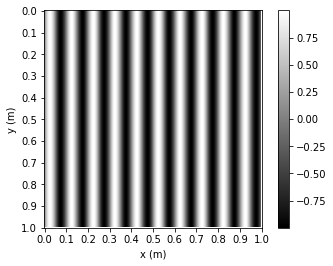

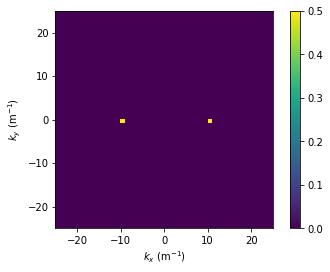

In [6]:
hW, hH = 100, 100
hFreq = 10

# Mesh on the square [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW +1), 2*hW+1)     # columns (Width)
y = np.linspace( 0, 2*hH/(2*hH +1), 2*hH+1)     # rows (Height)

[X,Y] = np.meshgrid(x,y)

A = np.sin(2*np.pi*hFreq*X)

plt.imshow(A, cmap = 'gray')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.xticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)])
plt.yticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)])
H,W = np.shape(A)
plt.show()

plt.figure()
F = fft2(A)/(W*H)                          
F = fftshift(F)
P = np.abs(F)                            
plt.imshow(P[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25])
plt.colorbar()
plt.xlabel('$k_x$ (m$^{-1}$)')
plt.ylabel('$k_y$ (m$^{-1}$)')
plt.show()

### Sum of horizontal and vertical plane waves

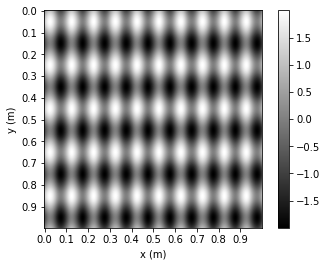

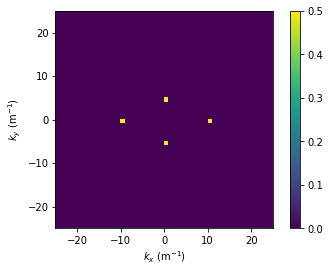

In [7]:
hFreq = 10
vFreq = 5

A1 = np.sin(2*np.pi*hFreq*X) + np.sin(2*np.pi*vFreq*Y)

plt.figure()
plt.xticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)])
plt.yticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)])
plt.imshow(A1, cmap = 'gray')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.show()

F1 = fft2(A1)/(W*H)                          
F1 = fftshift(F1)
P1 = np.abs(F1)

plt.figure()
plt.imshow(P1)

plt.imshow(P1[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25])
plt.colorbar()
plt.xlabel('$k_x$ (m$^{-1}$)')
plt.ylabel('$k_y$ (m$^{-1}$)')
plt.show()

### Diagonal plane wave

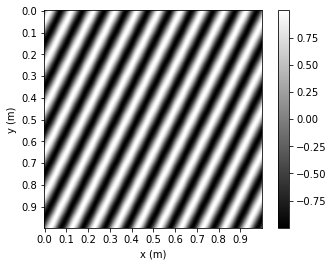

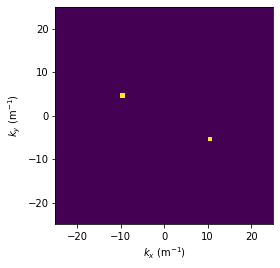

In [8]:
A2 = np.sin(hFreq*2*np.pi*X + vFreq*2*np.pi*Y)

plt.figure()
plt.xticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)])
plt.yticks(np.linspace( 0, 201, 11), [str(round(float(label), 2)) for label in np.arange(0, 1.01, 0.1)])
plt.imshow(A2, cmap = 'gray')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.show()


F2 = fft2(A2)/(W*H)                          
F2 = fftshift(F2)
P2 = np.abs(F2)

plt.figure()
plt.imshow(P2[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25])
plt.xlabel('$k_x$ (m$^{-1}$)')
plt.ylabel('$k_y$ (m$^{-1}$)')
plt.show()

### Questions for Discussion

#### 5.1 One key difference between the Fourier transform of time-based signals and 2D images is that the data in each case is a function of different dimensions: time and space, respectively. What units are used for the corresponding "spatial frequency" in each direction (x and y) in the examples above? Does this make sense in the context of the previous notebook with our time-based signals and Fourier-transformed frequency space plots?  

#### 5.2 We also have to consider the direction of the plane waves, so now we describe each possible wave not as a single frequency but as a vector with two values corresponding to each axis of the transformed image (written as $k_x$ and $k_y$ above). We call this quantity the "wavevector," and in each example above the wavevector points from the origin to the points with non-zero amplitude (the yellow dots). Why are there two wavevectors for a single plane wave? Hint: consider the symmetry of the plane wave in the original image.

# Plane Waves in Electronic Materials

**Disclaimer**: a lot of the theoretical background below is advanced for this class, and the lab will try to simply explain difficult concepts to the level that you can proceed with the analysis. If anything is confusing to you feel free to ask, but also feel free to skip to the bottom for the summary below, especially if you are short on time. Those who are interested should definitely take a solid state physics course in the future!

It turns out that there is a fundamental connection between plane waves and the electrons on a metallic surface. Electrons in a metal have the unique property that they are not confined to the nuclei of the atoms in the solid but can travel freely through the material. These "free" electrons also exist on the surface of the metal, and the best description of these particles is not as point objects but rather as plane waves that make up the electron sea. This is a direct example of the "wave-particle duality" you may have heard of in Quantum Mechanics. We can then relate the wavevector of the electronic states to the electron momentum using Planck's constant, so that $\vec{p} = \hbar \vec{k}$. This is the same way that momentum can be defined for photons even though they are massless.

Now one fundamental property of electrons that we must consider is that no more than two electrons can occupy the same quantum state, a statement known as the Pauli Exclusion Principle (you may have experience with this rule drawing electrons into atomic orbitals in chemistry class). This means that the electrons on the surface can't all have the same wavevector, and instead we find that they form a continuous band of plane waves with increasing momentum (and thus increasing energy) as the number of electrons increases. Because the total number of electrons is always finite, we must have a largest energy state corresponding to those electrons at the top of the band of states. This energy is known as the Fermi energy, and this value plays a critical role in understanding the electronic nature of the bulk material we are studying (for example, determining if the material is a conductor or an insulator). 

Lucky for us, the Fermi energy can be determined by studying the waveforms produced by defects inside the 2D electron sea. It can be shown that the electrons that most strongly scatter off of defects on the surface are those with wavevector very close to the Fermi wavevector, and so we can measure this value by finding the spatial frequency of the ripples in the STM images. This is where the 2D Fourier transform will be useful, because it makes the periodic features of the image easily understood.


**SIMPLE SUMMARY**: We don't have to understand all of the messy details above to figure out the procedure we are going to employ. Basically, we see oscillations in the electron sea that are due to scattering of electrons off of defects on the surface. These oscillations provide us with fundamental information about the material's electronic properties in the same way that ripples in a liquid formed by throwing a rock in it can teach us about the liquid's properties (the surface tension, for example). It turns out that the wavevector describing the electronic ripples can be related to a fundamental energy parameter of the material that determines the bulk electronic behavior and is critical for electronic devices and more advanced quantum-mechanical applications. This is known as the Fermi energy, and we will use 2D Fourier techniques to measure this value for a Copper surface.


Let's begin by visualizing a cleaner region of the Copper surface.

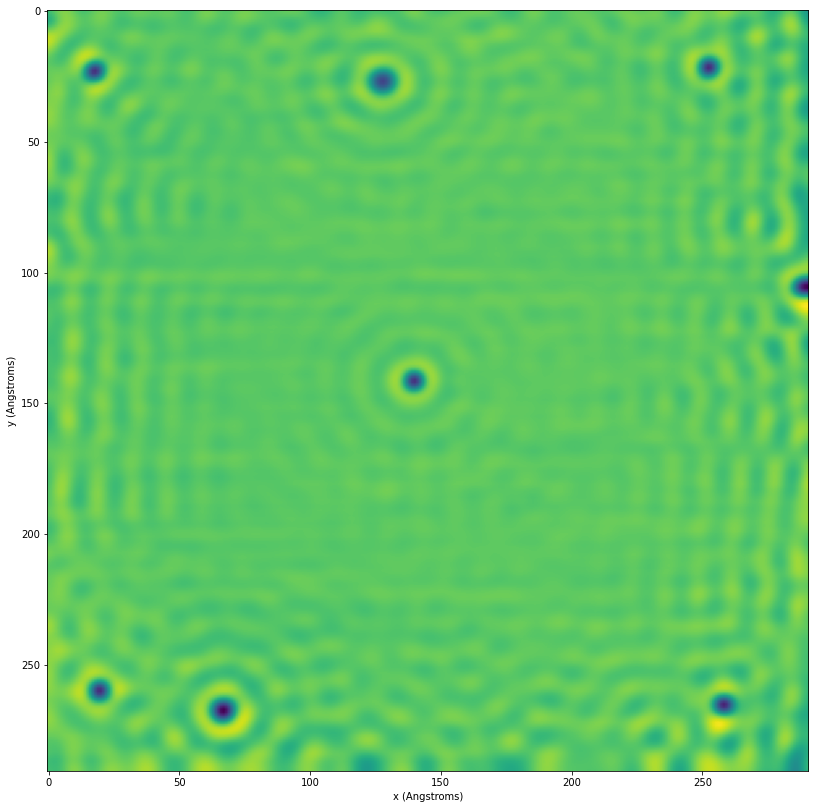

In [10]:
empty_2DEG = np.loadtxt("empty_topo.txt", delimiter=',')
defect_2DEG = np.loadtxt("defect_topo.txt", delimiter=',')

diff_map = defect_2DEG - empty_2DEG;

plt.figure(figsize = (14,14))
plt.imshow(defect_2DEG);
plt.xlabel('x (Angstroms)')
plt.ylabel('y (Angstroms)')
plt.show()

In this image it is much easier to see oscillations due to individual defects. We can now take the Fourier Transform of this image to try to uncover the periodicity of the ripples we see.

### Question for discussion

#### 6.1 Before you run the code below that takes the Fourier transform of the above image, how do you expect the circular ripples will appear in 2D frequency space? Discuss with your groups then make your best guess, and justify your answer. Hint: again, think of the symmetries involved.

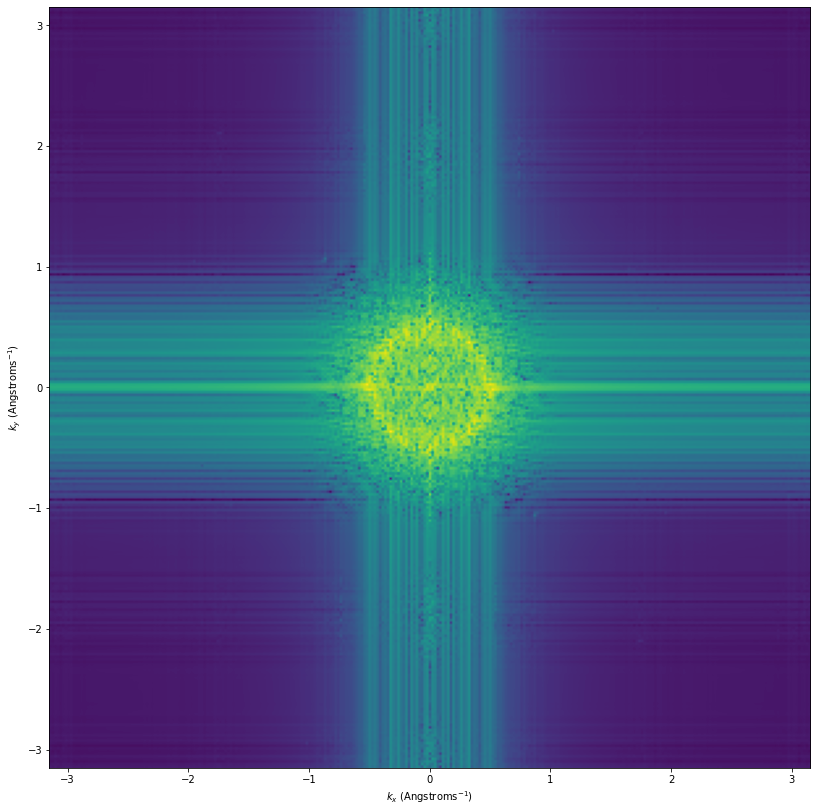

In [11]:
F_defect = fft2(defect_2DEG)                   
F_defect = fftshift(F_defect)
P2 = np.abs(F_defect)
P2 = np.log(P2+1)

plt.figure(figsize = (14,14))
plt.imshow(P2, extent=[-3.153, 3.153, -3.153, 3.153])
plt.xlabel('$k_x$ (Angstroms$^{-1}$)')
plt.ylabel('$k_y$ (Angstroms$^{-1}$)')
plt.show()

### Question for discussion

#### 6.2 Now that you have seen the transformed signal, can you explain how the ripples in the original image transform into the circular features in the Fourier transform? You can ignore the vertical and horizontal lines running through the center; these are due to the finite size of the image.


The original image unfortunately suffers from too much noise to adequately study the ripples in isolation. One way to circumvent the noise is to subtract the effect of the background before taking the Fourier transform and only retain the effect of the central defect. This can be accomplished by a more advanced STM technique whereby the scanning tip not only images the surface but can also manipulate individual particles and move them in two dimensions. We can thus move the central defect and scan the area again so that we have just the effect on the electron sea due to all of the surrounding defects.

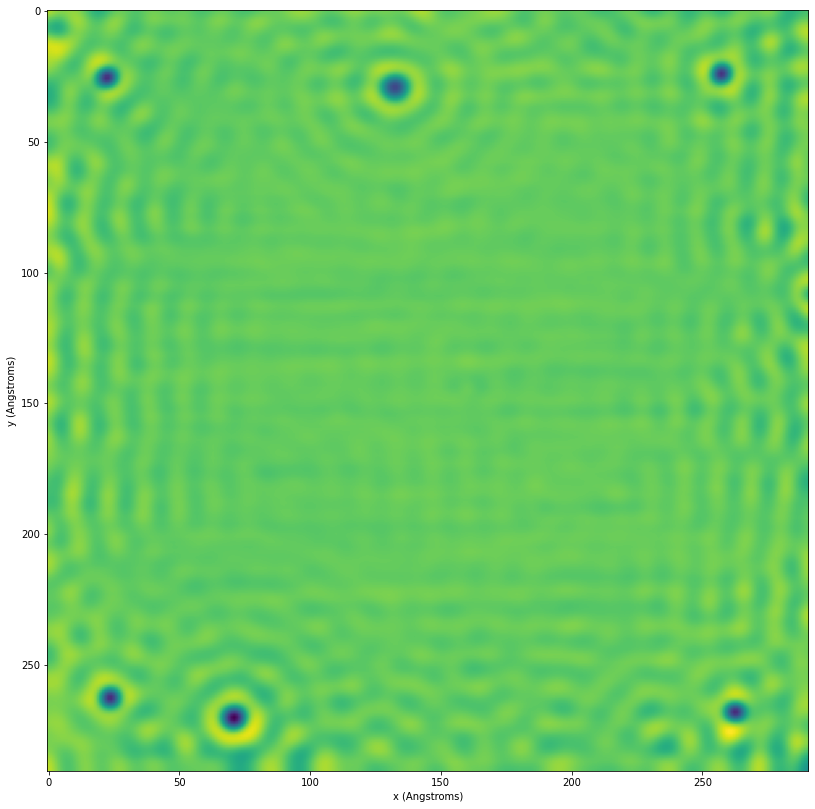

In [12]:
plt.figure(figsize = (14,14))
plt.imshow(empty_2DEG)
plt.xlabel('x (Angstroms)')
plt.ylabel('y (Angstroms)')
plt.show()

Now that we have the original map with and without the central defect, we can normalize both maps and take the difference to acquire just the effect of the central defect on the electronic density.

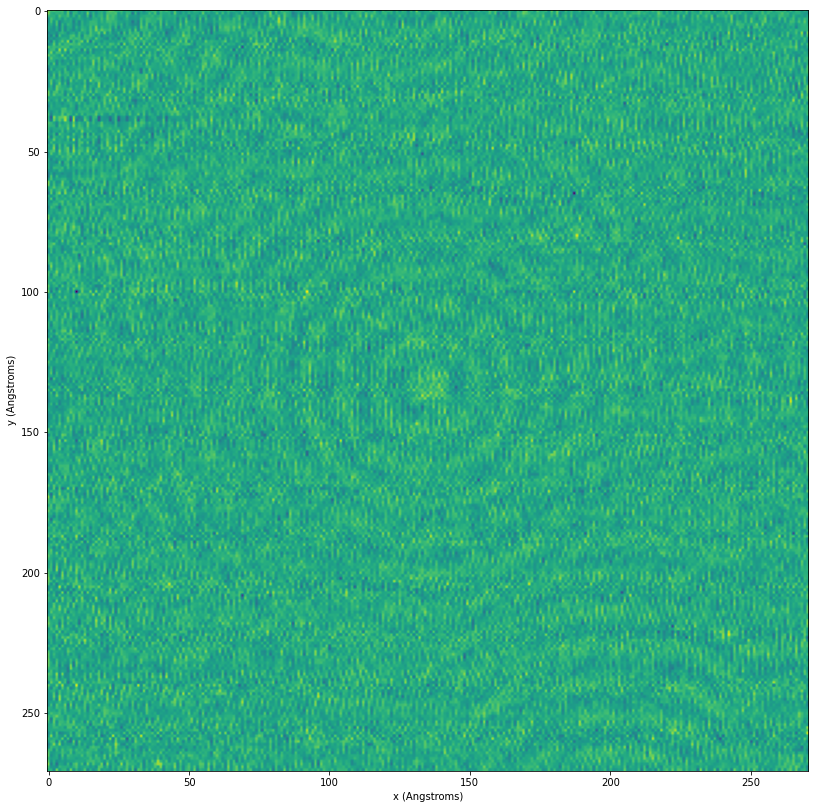

In [13]:
diff_map = np.loadtxt("diff_map.txt", delimiter=',')

plt.figure(figsize = (14,14))
plt.imshow(diff_map)
plt.xlabel('x (Angstroms)')
plt.ylabel('y (Angstroms)')
plt.show()

Although weaker in amplitude, the waveform created by the central defect is much more visible, and will lead to a more accurate Fourier transform, which we can see below.

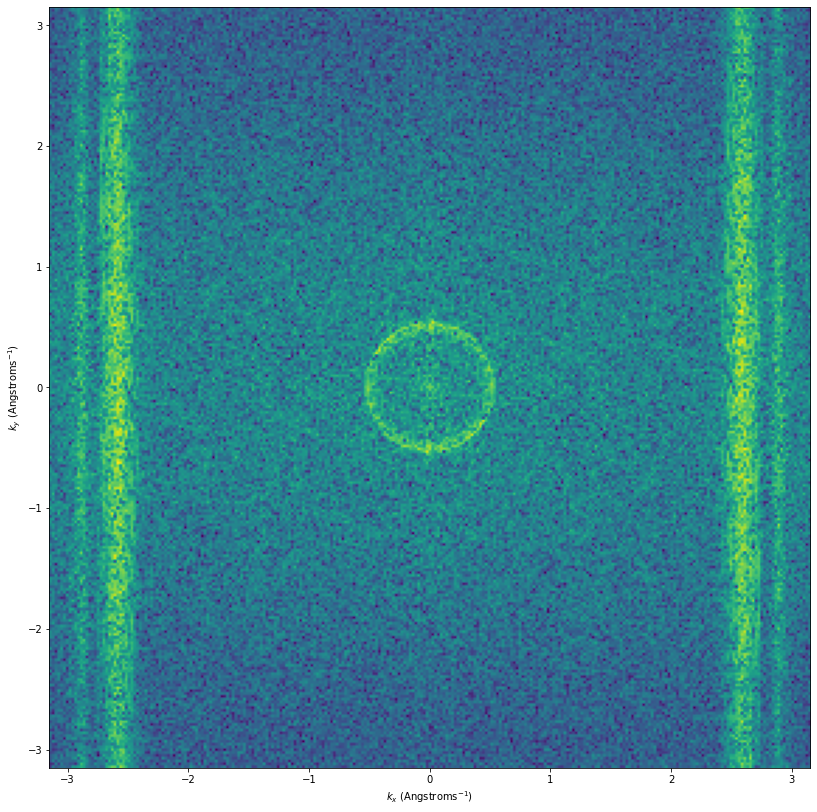

In [14]:
F_diff = fft2(diff_map)                    
F_diff = fftshift(F_diff)
P2 = np.abs(F_diff)
P2 = np.log(P2+1)

plt.figure(figsize = (14,14))
plt.imshow(P2, extent=[-3.153, 3.153, -3.153, 3.153])
plt.xlabel('$k_x$ (Angstroms$^{-1}$)')
plt.ylabel('$k_y$ (Angstroms$^{-1}$)')
plt.show()

This circular Fourier-transformed image is a direct visualization of the electronic plane waves with their energy level at the Fermi energy. The radius of this circle corresponds to twice the Fermi wavevector, and from this value we can measure the Fermi Energy.

### Question For Discussion

#### 7.1 We mentioned above that the wavevectors describing the electronic plane wave states have an associated momentum defined by $\vec{p} = \hbar \vec{k}$.  Using this relationship and the plot above, estimate the Fermi energy of Copper. Remember how momentum is related to kinetic energy in order to get the right formula, and also use the fact that the electrons in Copper have an effective mass $m_e = 0.38*m_0$, where $m_0$ is the rest mass of an electron (you can look up this value online). Ask the teachers for the actual value measured, and if you do this right you will have measured the Fermi energy to about 5 percent with very simple data processing.